In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # some imports to set up plotting
import seaborn as sns # pip install seaborn

import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [46]:
%matplotlib inline

In [7]:
# Берем данные отсюда: https://github.com/Laggg/data--for--students
# сначала считываем 2 строчки, чтобы понять разделитель колонок (по умолчанию разделитель - ",")
# в данном случае - разделитель колонок - символ ";"
df = pd.read_csv('beauty.csv', nrows=2)
df.head()

,wage;exper;union;goodhlth;black;female;married;service;educ;looks
0,5.73;30;0;1;0;1;1;1;14;4
1,4.28;28;0;1;0;1;1;0;12;3


In [8]:
df = pd.read_csv('beauty.csv', sep=';')
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


### Строим некоторые виды графиков
Обычный график, построенный по точкам. На вход может подаваться как лист, так и массив, серия значений. Возможно использовать следующие параметры:

linewidth ширина линии, соединяющей соседние точки

color цвет линии

marker вид точкек, которые соединяются линиями

linestyle стиль линии (сплошная, прерывистая, точка-тире и т.д.)

label подпись на легенде

Приведем пример графика с некоторыми параметрами, которые можно изменять. Все комбинации параметров смотрите в официальной документации https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

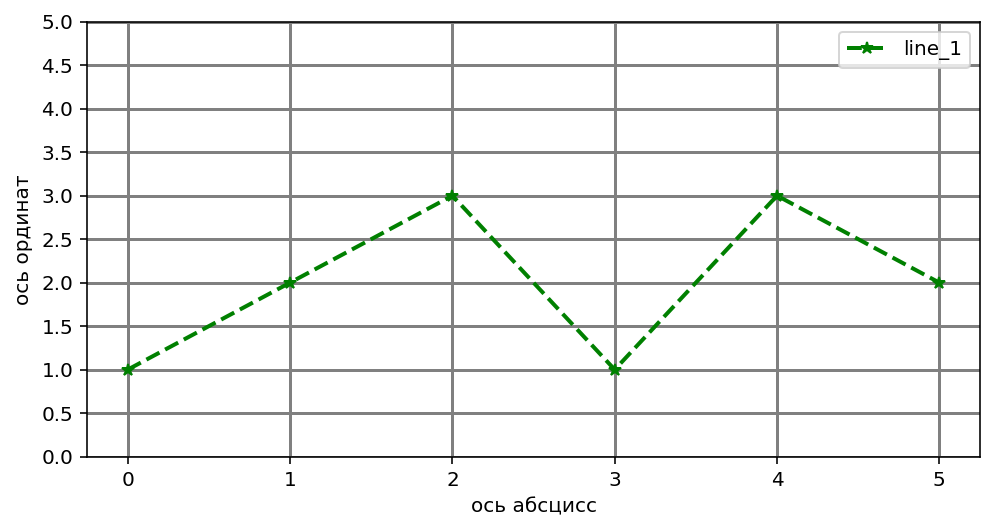

In [17]:
x = [1,2,3,1,3,2]
x = np.array(x)
x = pd.Series(np.array([1,2,3,1,3,2]))

plt.figure(figsize=(8,4)) # можно указать явно ширину и высоту графика (строчка не обязательна)
plt.plot(x, linewidth=2, color='green', marker='*', linestyle='dashed', label='line_1')
plt.legend() # показывать легенду
plt.grid(color='gray', linestyle='-', linewidth=1.5) # включить отрисовку сетки c определенными параметрами
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]) # можно явно указать, как подписывать ось
plt.xticks()
plt.xlabel('ось абсцисс')
plt.ylabel('ось ординат');

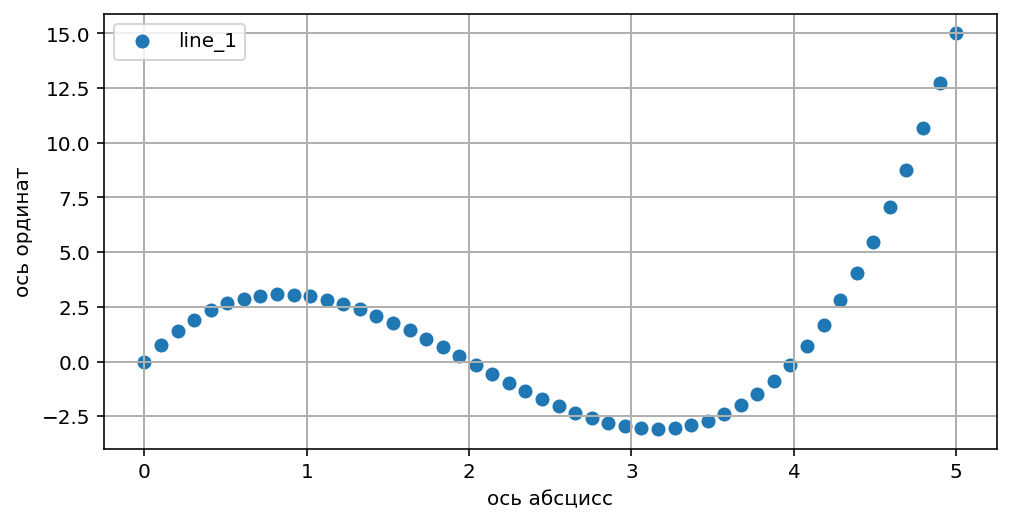

In [18]:
x = np.linspace(0, 5, 50) # создаем массив из 100 чисел float от 0 до 5 с равномернов шагом
y = x*(x - 2)*(x - 4)

plt.figure(figsize=(8,4)) # можно указать явно ширину и высоту графика (строчка не обязательна)
plt.scatter(x, y, label='line_1')
plt.legend() # показывать легенду
plt.grid(linewidth=1) # включить отрисовку сетки c определенными параметрами
plt.yticks()
plt.xticks()
plt.xlabel('ось абсцисс')
plt.ylabel('ось ординат');

Гистограмма - график, показывающий распределение какой-либо величины, встречающуюся в данном объеме значений. По другому, график показыват сколько раз встречается из выборки каждое значение в ней. Построим гистограммы с помощью разных библиотек.
Один из главных параметров bins - обратная величина к ширине столбцов на графике

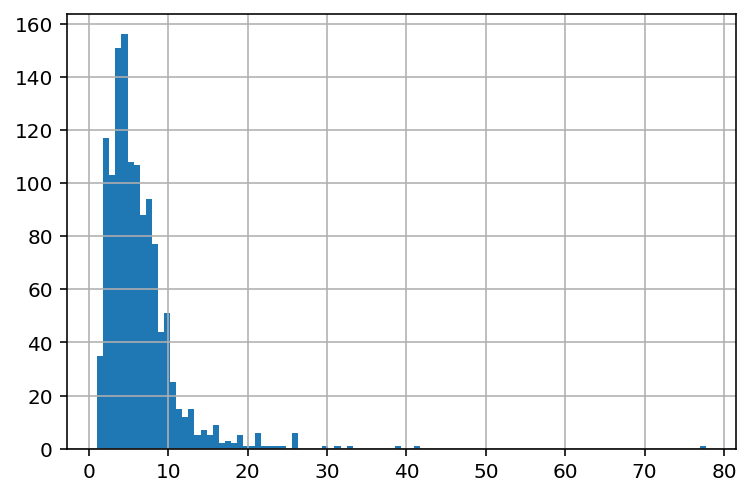

In [20]:
df['wage'].hist(figsize=(6, 4), bins=100);

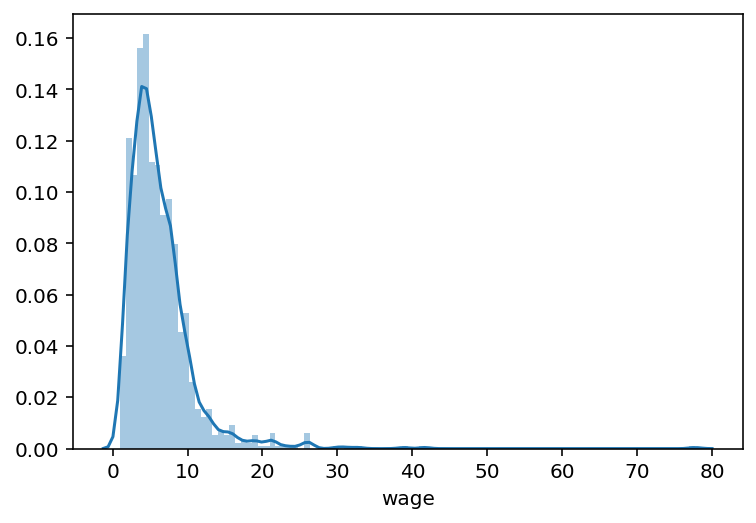

In [21]:
sns.distplot(df['wage'], bins=100);

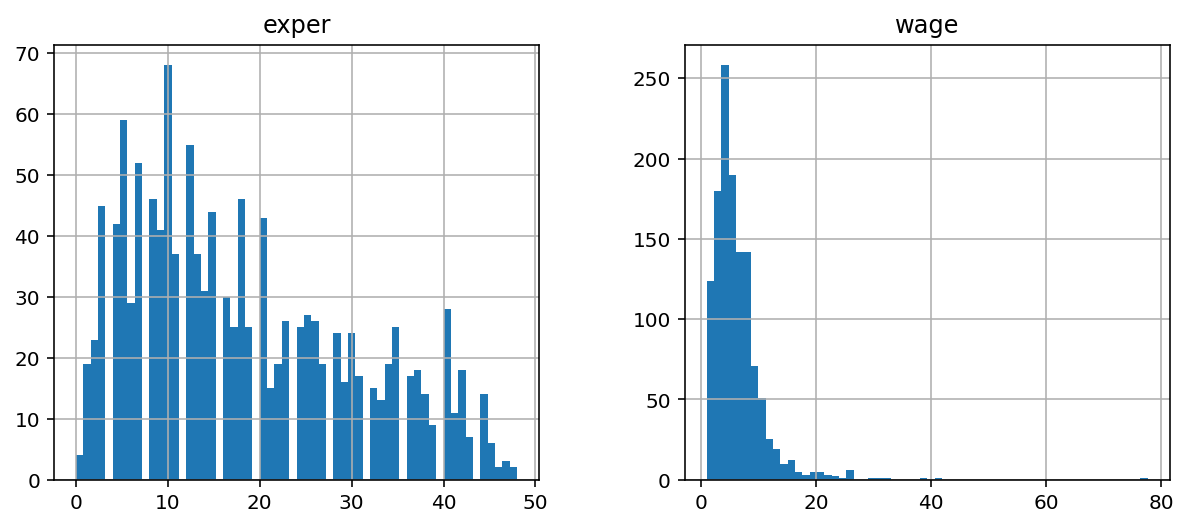

In [22]:
features = ['wage', 'exper']
df[features].hist(figsize=(10, 4), bins=60);

CountPlot - столбчатая диаграмма, чаще всего используется для категориальных признаков в данных. Показывает, сколько трочек в df имеют каждое из выбранного значения категориального признака.

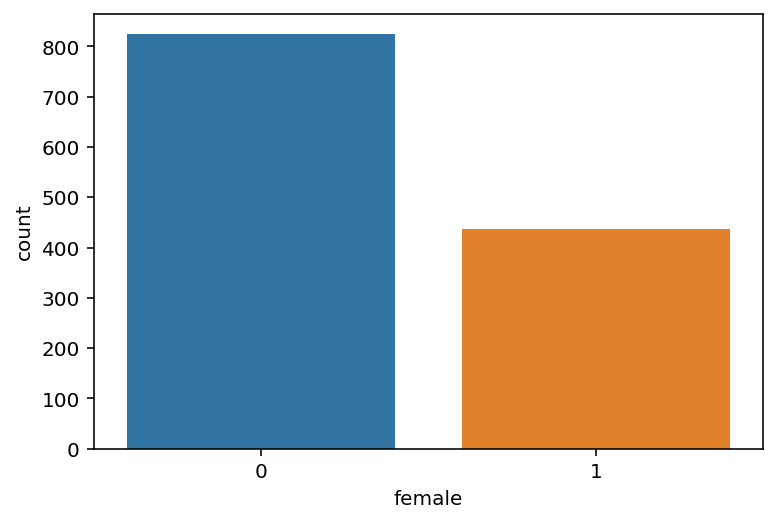

In [23]:
sns.countplot(x='female', data=df);

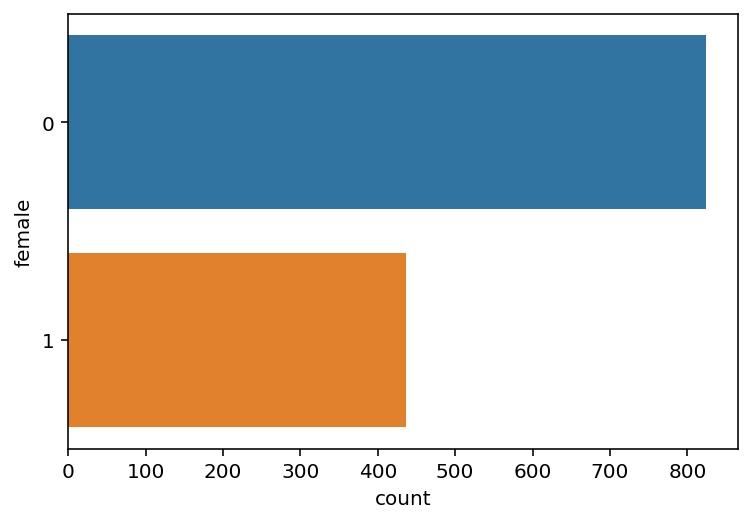

In [24]:
sns.countplot(y='female', data=df);

Приведем пример для столбца look относительно параметра female в DataFrame df

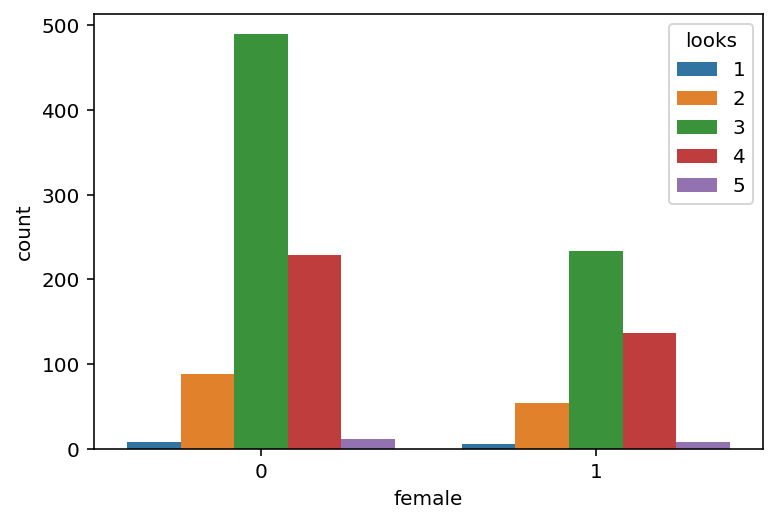

In [25]:
sns.countplot(x='female', hue='looks', data=df);

На следующем примере покажем, как нарисовать несколько графиков на одной картинке: axes - части графика. axes[0] - левая часть, а axes[1] - правая. Аналогично можно создать сетку 2х2 для 4х графиков (но для 4х графиков нужно указывать уже 2 координаты, например, ax=axis[1][1]).

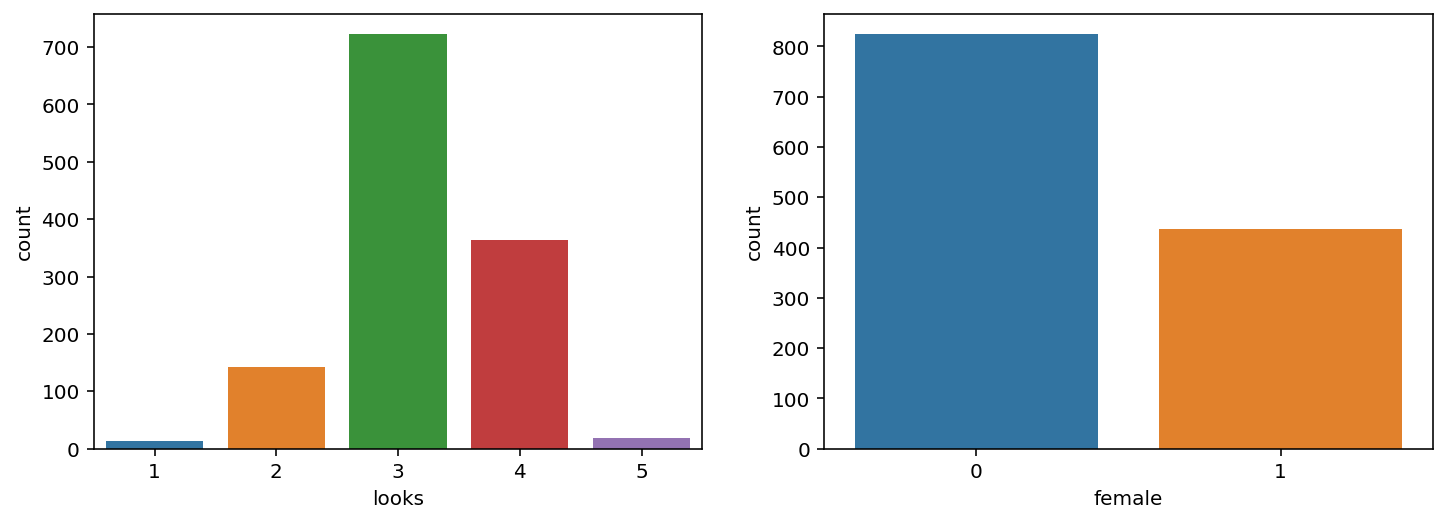

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='female', data=df, ax=axes[1]);
sns.countplot(x='looks', data=df, ax=axes[0]);

Круговая диаграмма отлично показывает соотношение частей:

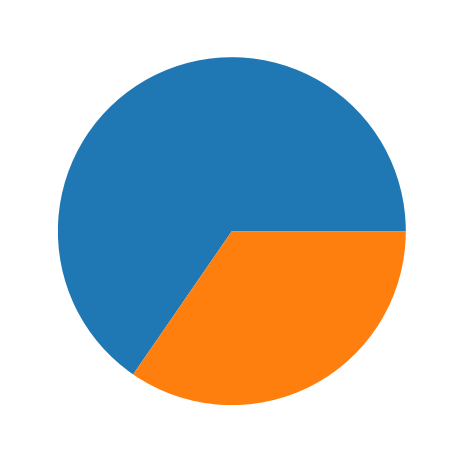

In [29]:
plt.pie(df.groupby('female')['wage'].count()); # круговая диаграмми (pie)

Ящик с усами, или boxplot Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили.
Черта внутри коробки обозначает медиану распределения.

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5IQR, Q3 + 1.5IQR), где IQR = Q3 - Q1 — интерквартильный размах.

Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.
// смотрим на попадание точек квартитель-куда попадает четверть точек

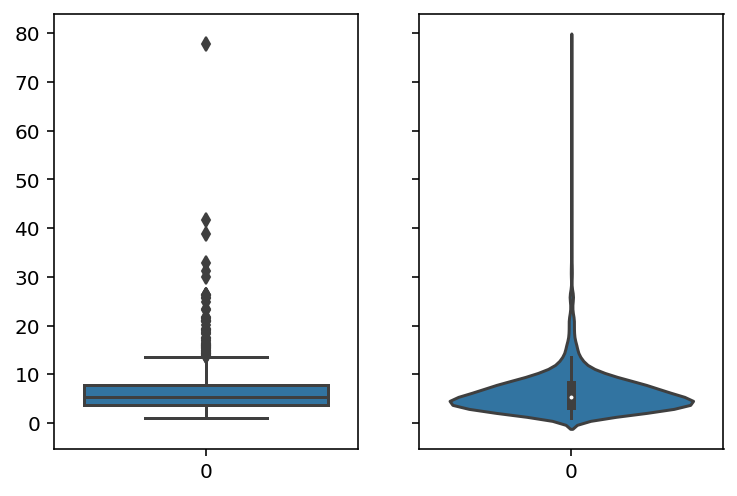

In [30]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['wage'], ax=axes[0]);
sns.violinplot(data=df['wage'], ax=axes[1]);

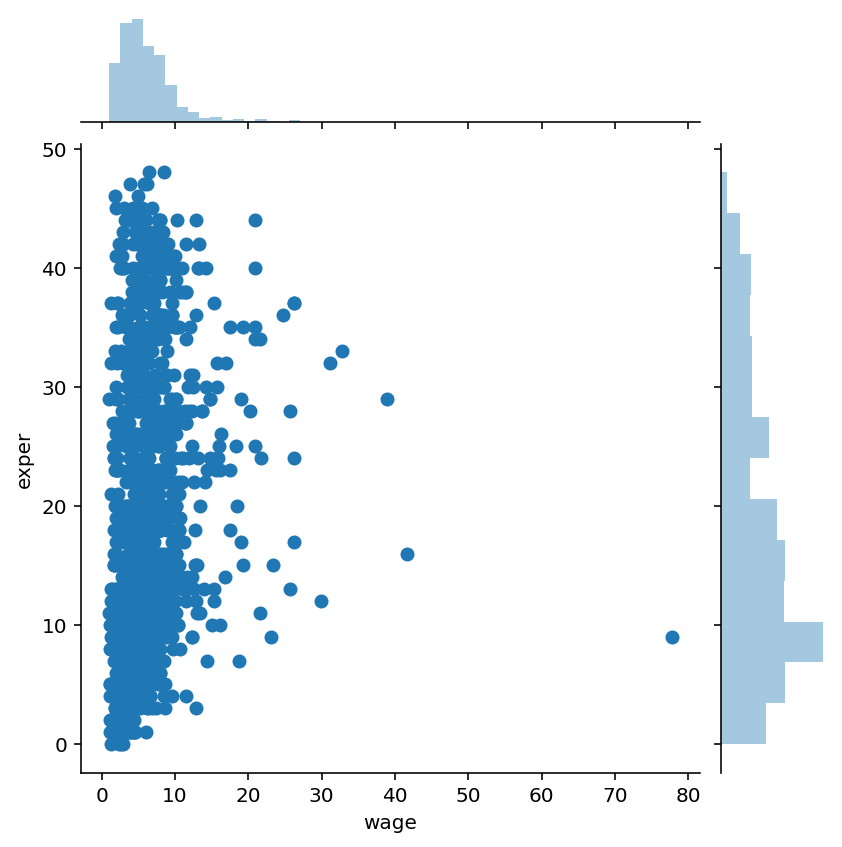

In [31]:
sns.jointplot(x='wage', y='exper', data=df, kind='scatter');

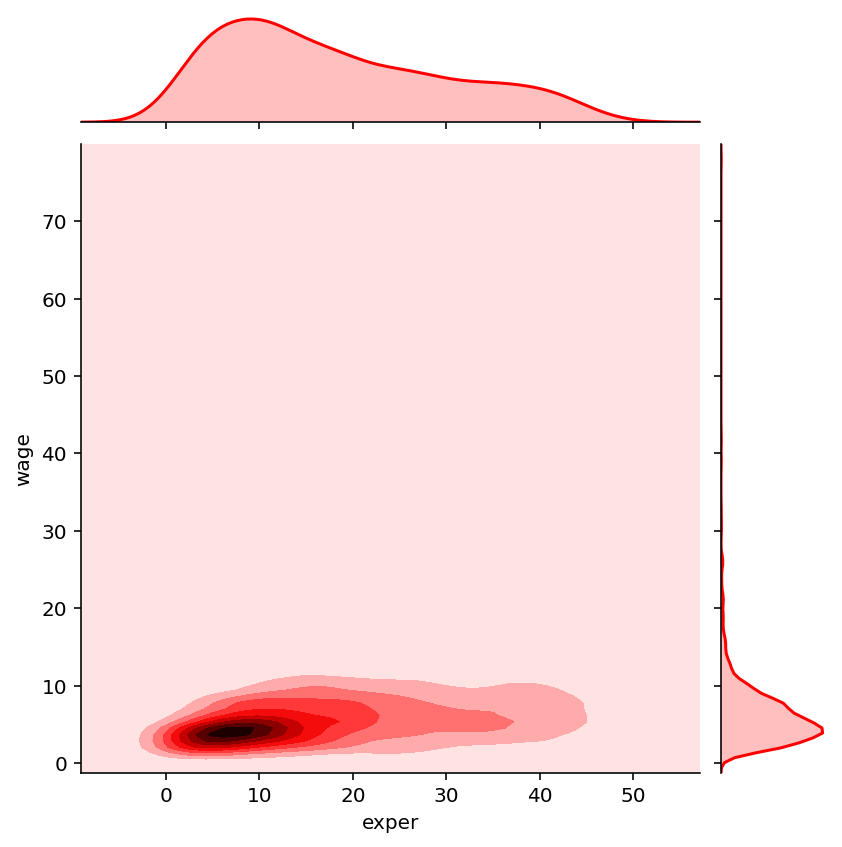

In [32]:
sns.jointplot('exper', 'wage', data=df, kind="kde", color="r");

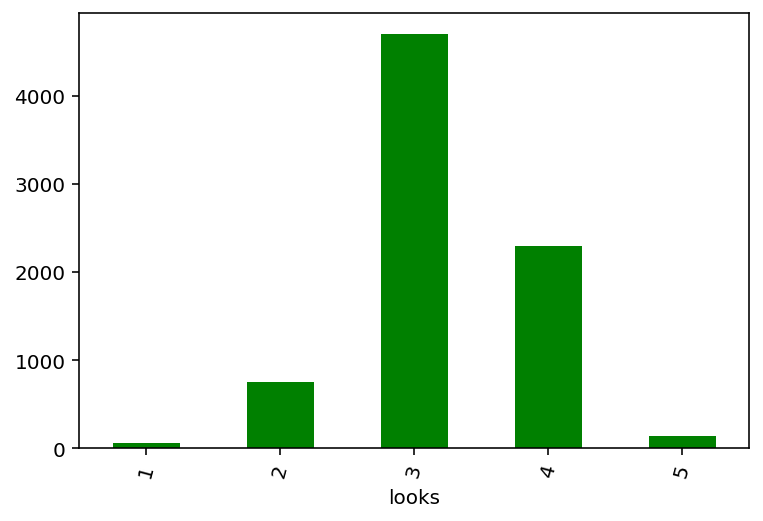

In [33]:
df.groupby('looks').wage.sum().plot(kind='bar', rot=75, color='green');

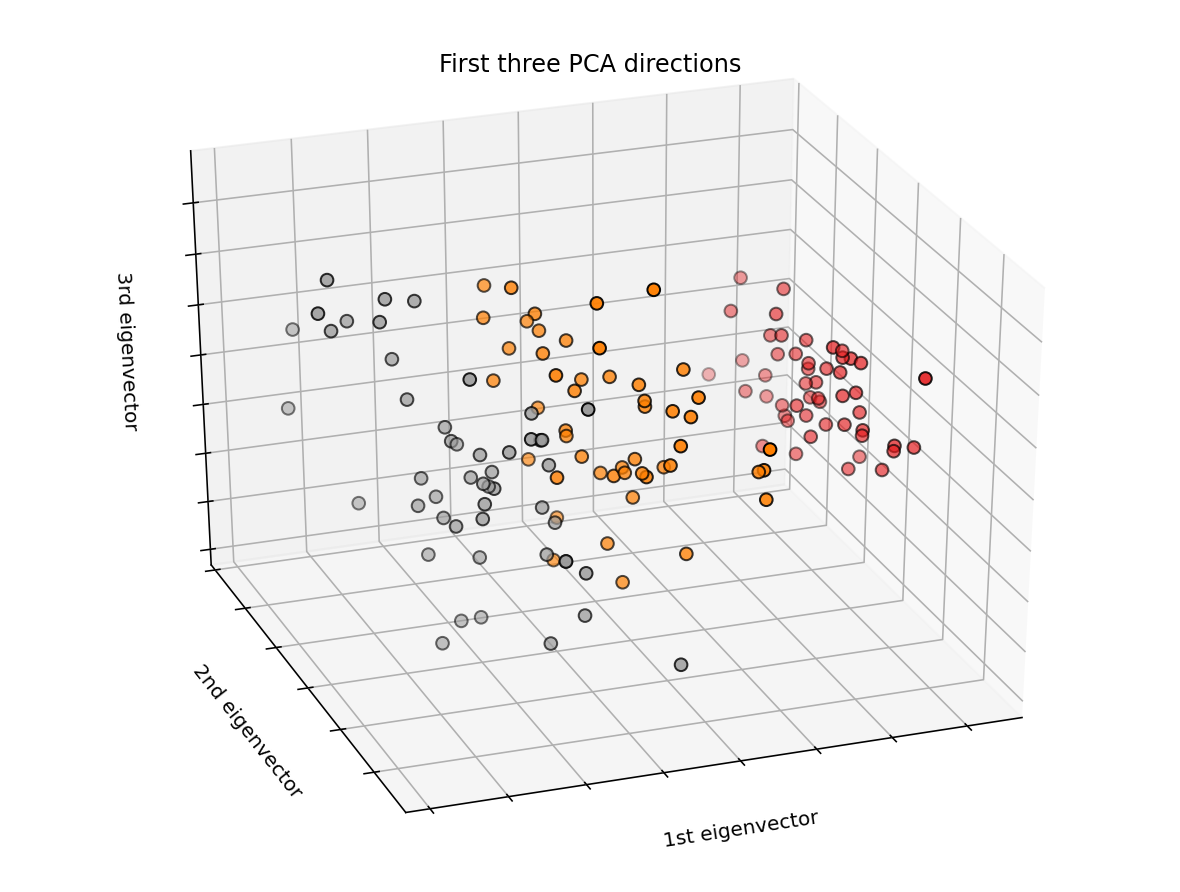

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
X_reduced = PCA(n_components=3).fit_transform(iris.data)


# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [45]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import matplotlib.lines as mlines

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

def newline(p1, p2, color=None): # функция отрисовки линии
    #function kredits to: https://fooobar.com/questions/626491/how-to-draw-a-line-with-matplotlib
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l


def one_image(w, X, Y): # фунцкия отрисовки одного кадра
    axes = plt.gca()
    axes.set_xlim([-4,4])
    axes.set_ylim([-1.5,1.5])
    d1 = {-1:'green', 1:'red'}
    im = plt.scatter(X[:,0], X[:,1], c=[d1[y] for y in Y])
    im = newline([0,-w[2]/w[1]],[-w[2]/w[0],0], 'blue')
    return im


# блок подготовки данных
iris = load_iris()
X = iris.data
Y = iris.target
pca = PCA(n_components=2)
X = pca.fit_transform(X)
Y = (Y == 2).astype(int)*2-1 # [0,1,2] --> [False,False,True] --> [0,1,1] --> [0,0,2] --> [-1,1,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2020)

history_w = np.array([[ 1.40100620e-02,  3.82414425e-02,  9.29992169e-03],
       [ 9.34759319e-02,  1.38405275e-02, -2.07000784e-02],
       [ 1.77059209e-01,  2.08938874e-02, -5.07000782e-02],
       [ 2.57582976e-01,  1.13119698e-02, -8.07000777e-02],
       [ 2.57845336e-01,  3.30044268e-02, -1.10700077e-01],
       [ 2.48875308e-01,  4.34713607e-02, -1.40700076e-01],
       [ 2.10330535e-01,  2.29165461e-02, -1.70700074e-01],
       [ 2.88030722e-01,  1.60452308e-02, -2.00700073e-01],
       [ 3.65670311e-01,  6.38421381e-04, -2.30700071e-01],
       [ 4.22698556e-01,  4.13726013e-03, -2.00700068e-01],
       [ 3.91374597e-01, -2.71359690e-03, -2.30700066e-01],
       [ 4.56157722e-01, -9.23192424e-03, -2.00700064e-01],
       [ 4.56157718e-01, -9.23192415e-03, -2.00700062e-01],
       [ 4.56157713e-01, -9.23192405e-03, -2.00700060e-01],
       [ 5.15303640e-01, -1.46237611e-02, -1.70700058e-01],
       [ 5.15303635e-01, -1.46237609e-02, -1.70700056e-01],
       [ 5.15303630e-01, -1.46237608e-02, -1.70700055e-01],
       [ 5.15303625e-01, -1.46237607e-02, -1.70700053e-01],
       [ 5.15303619e-01, -1.46237605e-02, -1.70700051e-01],
       [ 5.51273647e-01, -3.28065062e-02, -1.40700049e-01],
       [ 5.51273642e-01, -3.28065059e-02, -1.40700048e-01],
       [ 5.51273636e-01, -3.28065055e-02, -1.40700047e-01],
       [ 5.66508857e-01,  5.17263051e-03, -1.70700045e-01],
       [ 5.66508852e-01,  5.17263046e-03, -1.70700044e-01],
       [ 5.66508846e-01,  5.17263040e-03, -1.70700042e-01],
       [ 5.66508840e-01,  5.17263035e-03, -1.70700040e-01],
       [ 5.48868641e-01,  1.97012529e-02, -2.00700038e-01],
       [ 5.48868636e-01,  1.97012527e-02, -2.00700036e-01],
       [ 5.48868630e-01,  1.97012525e-02, -2.00700034e-01],
       [ 5.54086386e-01,  2.73468786e-02, -2.30700032e-01],
       [ 5.96543457e-01,  1.00993879e-02, -2.00700030e-01],
       [ 5.96543451e-01,  1.00993878e-02, -2.00700028e-01],
       [ 5.96543445e-01,  1.00993877e-02, -2.00700026e-01],
       [ 6.38206423e-01,  3.96740775e-03, -1.70700024e-01],
       [ 6.38206417e-01,  3.96740771e-03, -1.70700022e-01],
       [ 6.11201179e-01, -5.88772655e-03, -2.00700021e-01],
       [ 6.52906839e-01, -1.43675546e-02, -1.70700019e-01],
       [ 6.52906832e-01, -1.43675545e-02, -1.70700017e-01],
       [ 6.52906826e-01, -1.43675543e-02, -1.70700015e-01],
       [ 6.42197374e-01,  7.79748602e-04, -2.00700014e-01],
       [ 6.03251852e-01,  1.06133678e-02, -2.30700012e-01],
       [ 6.03251846e-01,  1.06133677e-02, -2.30700009e-01],
       [ 6.05295634e-01,  3.17685316e-02, -2.60700007e-01],
       [ 6.05295628e-01,  3.17685313e-02, -2.60700004e-01],
       [ 6.05295622e-01,  3.17685310e-02, -2.60700002e-01],
       [ 5.85487103e-01,  4.23576206e-02, -2.90699999e-01],
       [ 5.85487097e-01,  4.23576202e-02, -2.90699996e-01],
       [ 5.57651268e-01,  2.83422349e-02, -3.20699993e-01],
       [ 5.53558401e-01,  3.77632078e-02, -3.50699990e-01],
       [ 5.12157603e-01,  5.03918360e-02, -3.80699987e-01]])


fig = plt.figure()
ims = [] # набиваем в этот список кадры с помощью цикла
for i in range(50):
    im = one_image(history_w[i], X_train, Y_train)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True, # используем волшебную команду
                                repeat_delay=500)
writer = PillowWriter(fps=20) # устанавливаем фпс

ani.save("my_demo.gif", writer='imagemagick') # сохраняем



MovieWriter imagemagick unavailable; trying to use pillow instead.


TypeError: 'str' object is not callable

In [38]:
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.

SyntaxError: invalid syntax (<ipython-input-38-efda173d2310>, line 1)

## Homework

In [57]:
df = pd.read_csv('flight_delays.csv', sep = ',')
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


#### 1.Доля всех задержек ко всем вылетам

In [85]:
# рейс без задержек-0, с задержкой -1
df.loc[(df['dep_delayed_15min'] == "N"),'dep_delayed_15min' ] = int(0.)
df.loc[(df['dep_delayed_15min'] == "Y"),'dep_delayed_15min' ] = int(1.)

In [86]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,0
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,0
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,0
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,0
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,1


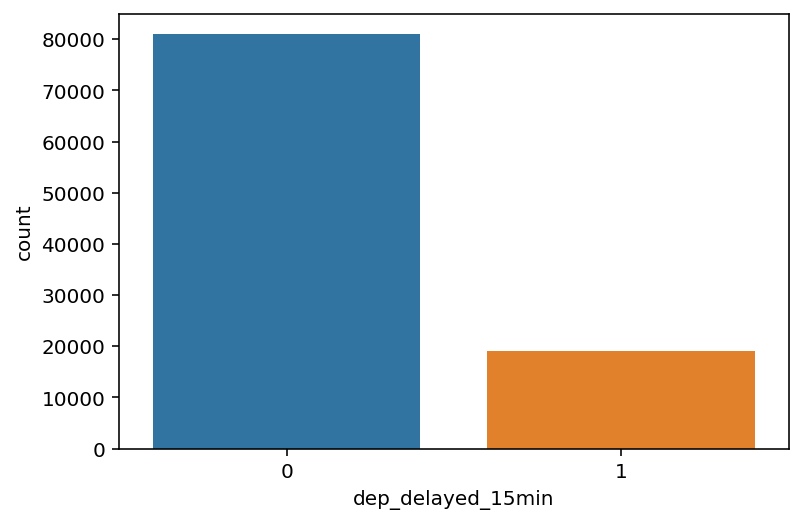

In [66]:
sns.countplot(x='dep_delayed_15min', data=df);

#### 2.Найти зависимость количества задержек от длины пути, который предстоит пролететь самолету

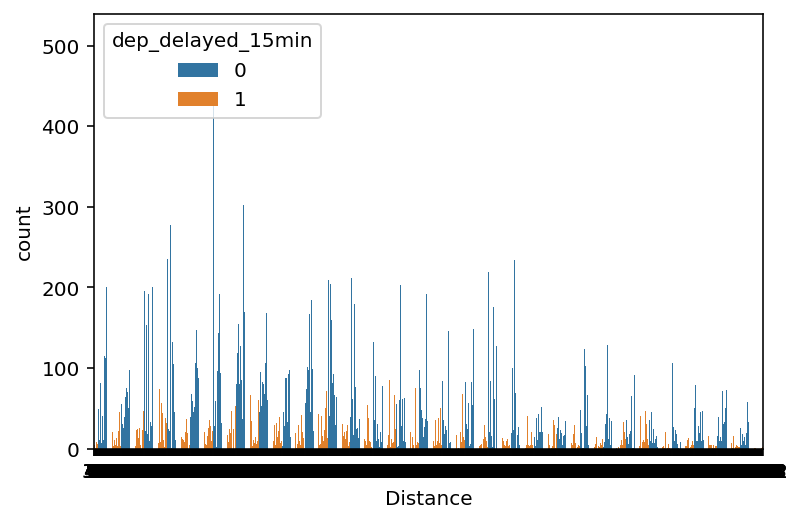

In [67]:
sns.countplot(x="Distance", hue='dep_delayed_15min', data=df);

По этому графику сложно что- либо сказать

In [73]:
df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [110]:
axes_y=[]

for x in range(250,5000,250):
    axes_y.append(df[(df["Distance"] < x) & (df["Distance"]>= x-250)]['dep_delayed_15min'].sum())

In [111]:
print(axes_y)

[2878, 5204, 4060, 2618, 1695, 692, 719, 421, 249, 319, 153, 14, 1, 4, 0, 2, 6, 5, 2]


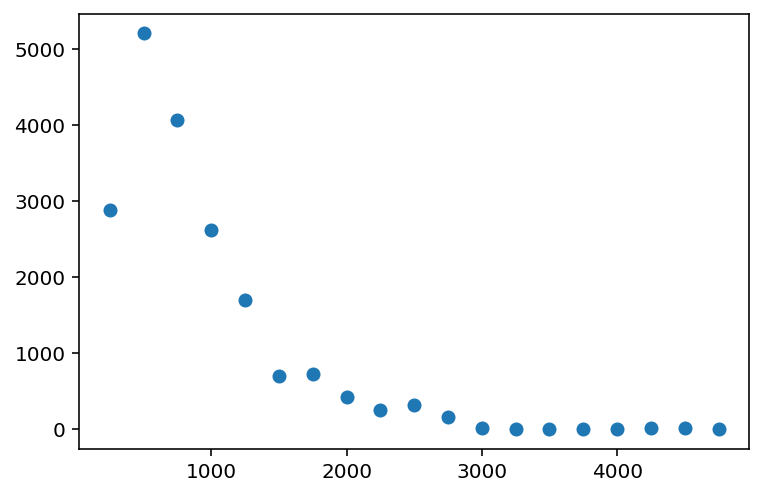

In [112]:
x=range(250,5000,250)
plt.scatter(x,axes_y)

Это уже лучше.Я попыталась разбить на промежутки по расстоянию и посмотреть на задержки , как видно, задержк сосредоточены в начале, график плохой,т.к является наброском. 

In [113]:
axes_y1=[]

for x in range(250,1000,50):
    axes_y1.append(df[(df["Distance"] < x) & (df["Distance"]>= x-250)]['dep_delayed_15min'].sum())

Text(0, 0.5, 'задержка по времемни в 15 мин')

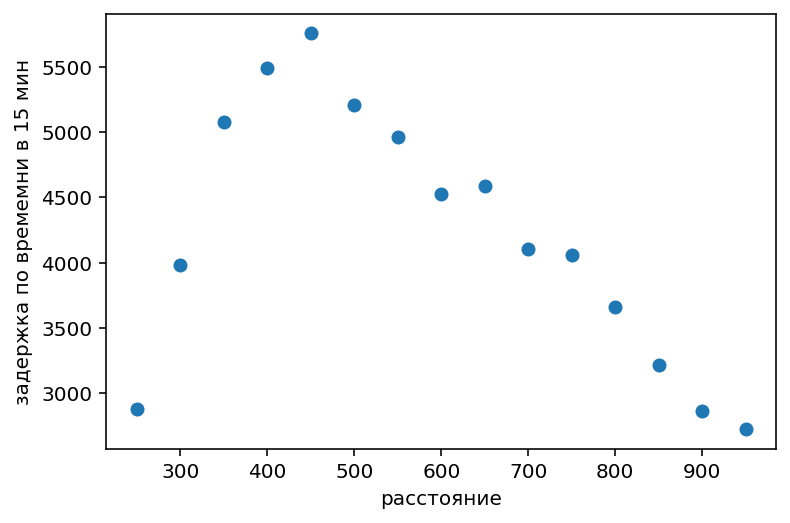

In [114]:
x1=range(250,1000,50)
plt.scatter(x1,axes_y1)
plt.xlabel('расстояние')
plt.ylabel('задержка по времемни в 15 мин')

In [115]:
df[(df["Distance"] < 5000 ) & (df["Distance"]>= 0)]['dep_delayed_15min'].count()

100000

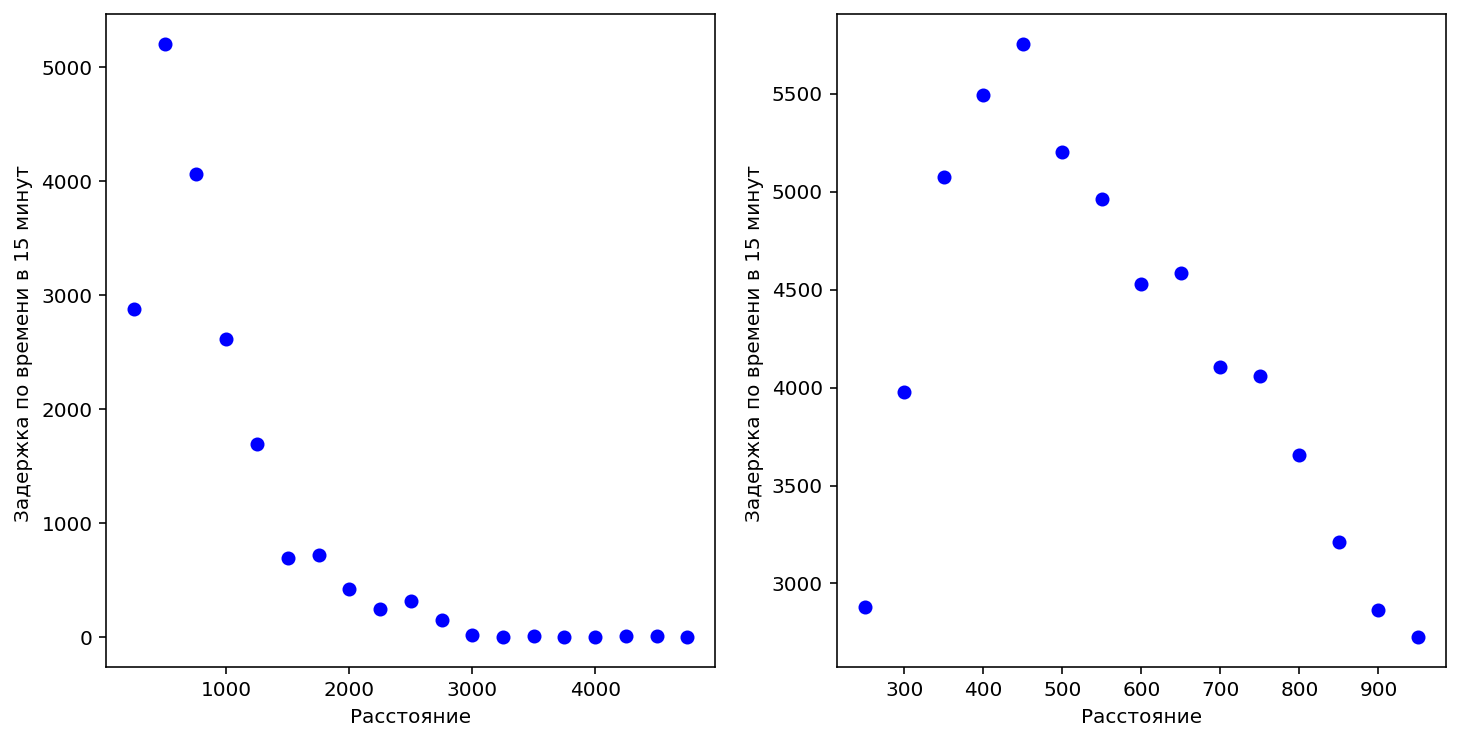

In [130]:
plt.figure(figsize=(12, 6))

x=range(250,5000,250)
plt.subplot(1,2,1)
plt.plot(x,axes_y, 'bo')
plt.xlabel('Расстояние')
plt.ylabel('Задержка по времени в 15 минут ')
plt.subplot(1,2,2)

plt.plot(x1,axes_y1, 'bo')
plt.xlabel('Расстояние')
plt.ylabel('Задержка по времени в 15 минут ')
plt.show()


Итого:

Мы видим, что при больших перелетах задержек почти нет. При этом максимальное число задержек среди рейсов, расстояние у которых, в пределах от 250-500 . 

#### 3.Топ 5 направлений, для которых чаще всего происходят задержки

In [193]:
df.groupby(["Origin","Dest"]).dep_delayed_15min.sum().sort_values(ascending=False).head(5)

Origin  Dest
ATL     LGA     50
ORD     LGA     45
LAS     LAX     40
ATL     EWR     39
DFW     ORD     37
Name: dep_delayed_15min, dtype: int64

#### 4.В какие времена года чаще всего происходят задержки рейсов

In [137]:
df.groupby('Month').dep_delayed_15min.sum().sort_values(ascending=False)

Month
c-7     2073
c-12    1994
c-6     1867
c-8     1783
c-3     1676
c-1     1539
c-10    1501
c-11    1397
c-2     1316
c-5     1313
c-4     1306
c-9     1279
Name: dep_delayed_15min, dtype: int64

In [184]:
season = []
for x in range(1,11,3):
    season.append(df[(df["Month"] <  'c-{}'.format(x+2) ) & (df["Month"]>= 'c-{}'.format(x) )]['dep_delayed_15min'].count())
    

In [187]:
data = np.array([season])
data = data.T
data = pd.DataFrame(data,index=['winter', 'spring', 'summer','autumn'])
print(data)

            0
winter  40341
spring  16951
summer  17536
autumn  16583


#### 5.Найти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [194]:
df.groupby('UniqueCarrier').dep_delayed_15min.sum().sort_values(ascending=True).head(10)

UniqueCarrier
AQ     18
HA     33
TZ     64
DH    156
F9    156
HP    196
B6    393
YV    478
AS    541
FL    736
Name: dep_delayed_15min, dtype: int64

#### 6.Найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

Чет я запуталась в данных

#### 7.Найти необычную зависимость количества задержек от имеющихся данных

Без понятия